<a href="https://colab.research.google.com/github/MichelleRitaM/MichelleRitaM/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pycountry

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 4.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=fcd70205d5c81f5cb4967edeaa819be6ea8b2692960449a3d9bd10af4fd70690
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built pycountry


In [3]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 1.8 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=606dc2e36caea9e8d31bd0b38fcc21bfc5145590f773306816d7e02e4336302a
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [4]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
# Authentication
consumerKey = "L6Of6zefLv5mpKaBHDV0NDvcc"
consumerSecret = "3uRcoYoVP0YPi26RXJ3UOj4aSQLr6VCbeRcTWMOAxbnHV4gCwR"
accessToken = "297976287-gS57FevcLTRkbtIjd88YpPi9f3LnrscPh4ErYZzX"
accessTokenSecret = "q9V1RjR1A6iZaLA3s6qWX4sLV87DkouMPk89QlFLscvxu"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [6]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)


keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze:"))
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
  negative_list.append(tweet.text)
  negative += 1
 elif pos > neg:
  positive_list.append(tweet.text)
  positive += 1
 
 elif pos == neg:
  neutral_list.append(tweet.text)
  neutral += 1
  
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [ ]:
positive

'28.7'

In [ ]:
negative

'2.8'

In [ ]:
neutral

'68.5'

In [ ]:
negative_list

['RT @DaisukiPlus: 【ซับไทย】 CHARACTER\nนำแสดงโดย : สุดะ มาซากิ , Fukase (วง Sekai no owari ), โอกุริ ชุน\nดูเลย↓↓\nhttps://t.co/PObDiyhEnm https…',
 'RT @cxrtezs: do u ever get those random moods where ur not urself for like a week straight',
 'RT @kirawontmiss: kanye a certified hater this is insane',
 'I read To Kill a Mocking Bird in eighth grade middleschool at 12-13 and my entire class (with help from the teacher… https://t.co/fBdtuLveCc',
 'RT @ReallyActivist: My kids have to do fuckin’ school shooter drills 5x a year but little BrittanyAnne’s feelings will be harmed if god for…',
 'RT @euanrellie: The whole point of ‘To Kill A Mockingbird’ is that it’s difficult https://t.co/oQmNb63jn7',
 'RT @MGithuga: A couple of months ago, Ruto argued that kenya economy cannot afford to devolve 35% to counties as proposed in BBI. Months la…',
 'RT @KenyaOn70901895: During the #BBI campaigns, Murkommen used to carry lorries of people to the rallies, then leave with them after he had…',
 '@van

In [ ]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(2)

,0,text
0,RT @DaisukiPlus: 【ซับไทย】 CHARACTER\nนำแสดงโดย...,"【ซับไทย】 character\nนำแสดงโดย : สุดะ มาซากิ ,..."
1,I vote for @BTS_twt's #Butter for the #BestMus...,i vote for _twt's #butter for the #bestmusicv...


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
    tw_list.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
    tw_list.loc[index, 'sentiment'] = "positive"
 else:
    tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp
tw_list.head(2)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @DaisukiPlus: 【ซับไทย】 CHARACTER\nนำแสดงโดย...,"【ซับไทย】 character\nนำแสดงโดย : สุดะ มาซากิ ,...",0.0,0.0,negative,NaN,NaN,NaN,NaN
1,I vote for @BTS_twt's #Butter for the #BestMus...,i vote for _twt's #butter for the #bestmusicv...,0.0,0.0,neutral,0.0,1.0,0.0,0.0


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]
tw_list_negative.head(2)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @DaisukiPlus: 【ซับไทย】 CHARACTER\nนำแสดงโดย...,"【ซับไทย】 character\nนำแสดงโดย : สุดะ มาซากิ ,...",0.00,0.00,negative,NaN,NaN,NaN,NaN
85,RT @cxrtezs: do u ever get those random moods ...,do u ever get those random moods where ur not...,-0.15,0.45,negative,NaN,NaN,NaN,NaN


In [ ]:
#Function to Create Wordcloud
def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
    max_words=3000,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


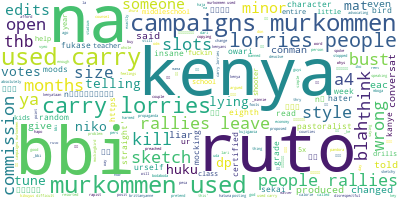

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list_negative["text"].values)

In [ ]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(lowercase = True, stop_words = 'english') 
countVector = countVectorizer.fit_transform(tw_list_negative['text'])

print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

6 Number of reviews has 38 words


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,2013,2017,adf,ama,arrested,ashamed,border,called,collaboration,congo,cross,deserve,don,dr,earthquakeeffectke,earthquakeinbungoma,earthquakeinkirinyaga,father,figure,grandpa,moses,mudavadi,musalia,niku,pm,rashid,respect,risk,safe,salim,securi,sorry,terrorist,thanks,tucheze,wanted,wetangula,win
0,0,0,1,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,1,0,0
1,0,0,1,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,1,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,0,1,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,1,0,0
4,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
salim,3
adf,3
rashid,3
arrested,3
wanted,3
border,3
collaboration,3
congo,3
cross,3
terrorist,3


In [ ]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
  vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0) 
  words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
  return words_freq[:n]

In [ ]:
#n3_bigram
n2_bigrams = get_top_n_gram(tw_list_negative['text'],(3,3),20)
n2_bigrams

[('bbi campaigns murkommen', 4),
 ('campaigns murkommen used', 4),
 ('murkommen used carry', 4),
 ('used carry lorries', 4),
 ('carry lorries people', 4),
 ('lorries people rallies', 4),
 ('people rallies leave', 4),
 ('style slots bust', 2),
 ('slots bust sketch', 2),
 ('bust sketch a4', 2),
 ('sketch a4 size', 2),
 ('thb minor edits', 2),
 ('telling dp 100', 2),
 ('dp 100 mat', 2),
 ('100 mat kenya', 2),
 ('mat kenya votes', 2),
 ('kenya votes lying', 2),
 ('votes lying niko', 2),
 ('lying niko huku', 2),
 ('niko huku na', 2)]